In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='Meenakshi@123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/MEENAKSHI/OneDrive/Desktop/ECommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect(  host='localhost',
    port=3306,
    user='root',
    password='Meenakshi@123',
    database='ecommerce')
cur = db.cursor()

#  List all unique cities where customers are located.

In [2]:
query = """ select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#  Count the number of orders placed in 2017 

In [3]:
query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017 are",data[0][0]

('Total orders placed in 2017 are', 90202)

# Find the total sales per category

In [9]:
query = """ select upper(products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category"""
cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns=['Category','Sales'])
print(df)

                       Category       Sales
0                     PERFUMERY  1013477.32
1          FURNITURE DECORATION  2860352.78
2                     TELEPHONY   973764.10
3                BED TABLE BATH  3425107.34
4                    AUTOMOTIVE  1704588.66
..                          ...         ...
69               CDS MUSIC DVDS     2398.86
70                   LA CUISINE     5827.06
71  FASHION CHILDREN'S CLOTHING     1571.34
72                     PC GAMER     4348.86
73       INSURANCE AND SERVICES      649.02

[74 rows x 2 columns]


#  Calculate the percentage of orders that were paid in installment

In [10]:
query = """ select sum(case when payment_installments>=1 then 1
else 0 end)/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

#  Count the number of customers from each state

   state  customer_count
0     SP           83492
1     SC            7274
2     MG           23270
3     PR           10090
4     RJ           25704
5     RS           10932
6     PA            1950
7     GO            4040
8     ES            4066
9     BA            6760
10    MA            1494
11    MS            1430
12    CE            2672
13    DF            4280
14    RN             970
15    PE            3304
16    MT            1814
17    AM             296
18    AP             136
19    AL             826
20    RO             506
21    PB            1072
22    TO             560
23    PI             990
24    AC             162
25    SE             700
26    RR              92


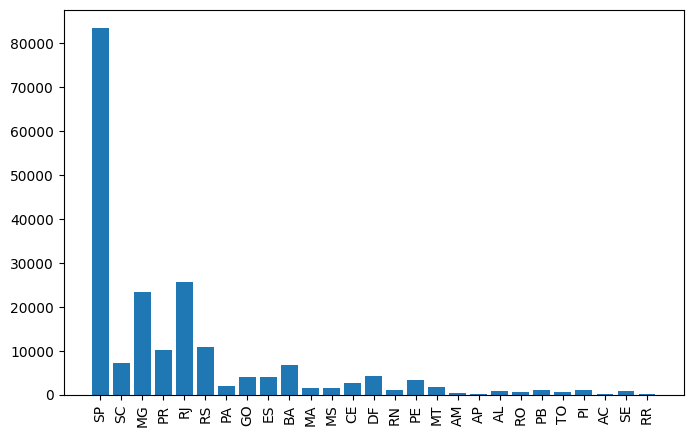

In [11]:
query = """select customer_state,count(customer_id) from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["state","customer_count"])
print(df)
plt.figure(figsize=(8,5))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()


# Calculate the no.of orders per month in 2018

      months  order_count
0       July        12584
1     August        13024
2   February        13456
3       June        12334
4      March        14422
5    January        14538
6        May        13746
7      April        13878
8  September           32
9    October            8


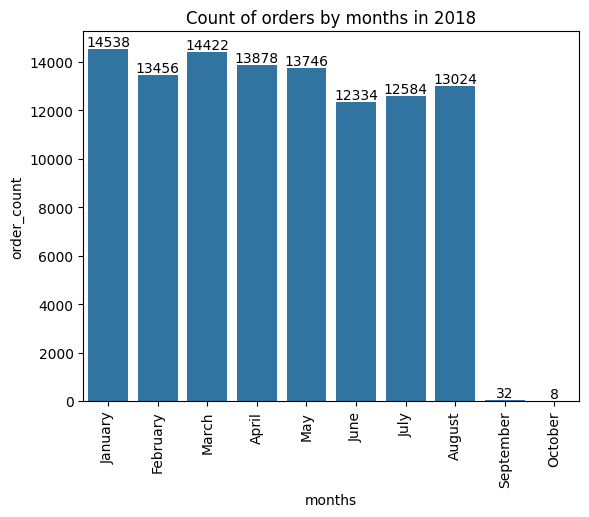

In [21]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data, columns=["months","order_count"])
print(df)
o=["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df,order=o)
plt.xticks(rotation=90)
plt.title("Count of orders by months in 2018")
ax.bar_label(ax.containers[0])
plt.show()

# Find the average no.of products per orders, grouped by customer city.

In [31]:
query = """ WITH count_per_order AS (
    SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items
        ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT customers.customer_city, ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers
JOIN count_per_order
    ON customers.customer_id = count_per_order.customer_id 
GROUP BY customers.customer_city order by average_orders desc;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer city","Average products/order"])
df.head(10)

,customer city,Average products/order
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,curralinho,8.00
7,picarra,8.00
8,morro de sao paulo,8.00
9,teixeira soares,8.00


# calculate the percentage of total revenue contributed by each product category

In [34]:
query = """ SELECT 
    UPPER(products.product_category) AS category,
    ROUND((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM products
JOIN order_items 
    ON products.product_id = order_items.product_id
JOIN payments 
    ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales_percentage DESC
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["category","percentage distribution"])
print(df)

                       category  percentage distribution
0                BED TABLE BATH                    21.40
1                 HEALTH BEAUTY                    20.71
2          COMPUTER ACCESSORIES                    19.81
3          FURNITURE DECORATION                    17.87
4               WATCHES PRESENT                    17.86
..                          ...                      ...
69                     PC GAMER                     0.03
70              HOUSE COMFORT 2                     0.02
71               CDS MUSIC DVDS                     0.01
72  FASHION CHILDREN'S CLOTHING                     0.01
73       INSURANCE AND SERVICES                     0.00

[74 rows x 2 columns]


# Identify the correlation between product price and the no.of times a product has been purchased.

In [37]:
query = """ SELECT 
    products.product_category,
    COUNT(order_items.product_id),
    ROUND(AVG(order_items.price), 2)
FROM products
JOIN order_items 
    ON products.product_id = order_items.product_id
GROUP BY products.product_category;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["category","Order count","price"])
print(df)

                           category  Order count   price
0                     HEALTH BEAUTY        19340  130.16
1                     sport leisure        17282  114.34
2                        Cool Stuff         7592  167.36
3              computer accessories        15654  116.51
4                   Watches present        11982  201.14
..                              ...          ...     ...
69                          flowers           66   33.64
70  Kitchen portable and food coach           30  264.57
71       CITTE AND UPHACK FURNITURE           76  114.95
72                  House Comfort 2           60   25.34
73                   cds music dvds           28   52.14

[74 rows x 3 columns]


# Identify the correlation between product price and the no.of times a product has been purchased

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect(  host='localhost',
    port=3306,
    user='root',
    password='Meenakshi@123',
    database='ecommerce')
cur = db.cursor()
query = """  
SELECT 
    products.product_category,
    COUNT(order_items.product_id),
    ROUND(AVG(order_items.price), 2)
FROM ecommerce.products
JOIN ecommerce.order_items 
    ON products.product_id = order_items.product_id
GROUP BY products.product_category;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Category","order_count","price"])
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])
print("The correlation is",a[0][-1])

The correlation is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue

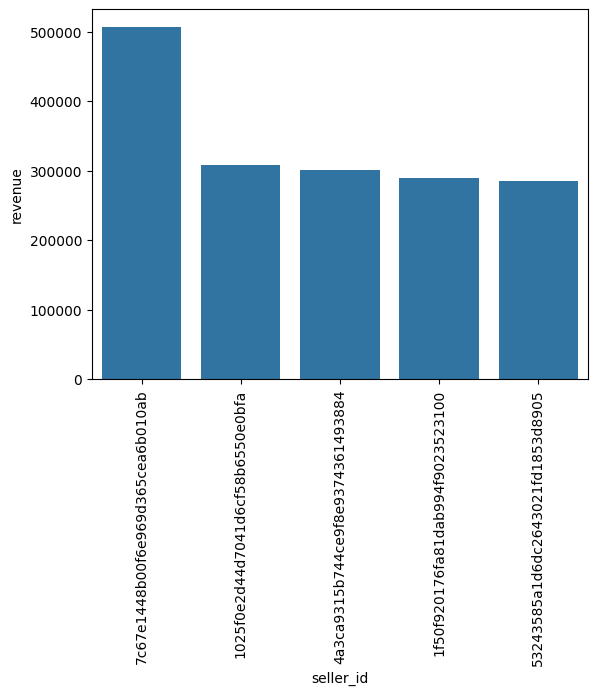

In [33]:
import seaborn as sns
query = """ select *,dense_rank() over(order by revenue desc)from 
(select order_items.seller_id,sum(payments.payment_value) revenue
from order_items join payments on order_items.order_id =payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head(5)
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# calculate the moving average of order values for each customer over their order history

In [37]:
query = """
SELECT customer_id, 
       order_purchase_timestamp, 
       payment,
       AVG(payment) OVER (
           PARTITION BY customer_id 
           ORDER BY order_purchase_timestamp 
           ROWS BETWEEN 2 PRECEDING AND CURRENT ROW ) AS mov_avg
FROM (SELECT orders.customer_id, 
           orders.order_purchase_timestamp, 
           payments.payment_value AS payment
    FROM payments 
    JOIN orders ON payments.order_id = orders.order_id
) AS a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
print(df)

                                       0                    1       2  \
0       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
1       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
2       000161a058600d5901f007fab4c27140  2017-07-16 09:40:32   67.41   
3       000161a058600d5901f007fab4c27140  2017-07-16 09:40:32   67.41   
4       0001fd6190edaaf884bcaf3d49edf079  2017-02-28 11:06:43  195.42   
...                                  ...                  ...     ...   
207767  ffff42319e9b2d713724ae527742af25  2018-06-13 16:57:05  214.13   
207768  ffffa3172527f765de70084a7e53aae8  2017-09-02 11:53:32   45.50   
207769  ffffa3172527f765de70084a7e53aae8  2017-09-02 11:53:32   45.50   
207770  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   
207771  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   

                 3  
0       114.739998  
1       114.739998  
2        67.410004  
3        67.410004  
4       195.419998

# Calculate the cumulative sales per month for each year

In [39]:
query = """
SELECT years, 
       months, 
       payment, 
       SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales
FROM ( SELECT   YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years, months
    ORDER BY years, months
) AS a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
print(df)

       0   1           2            3
0   2016   9      504.48       504.48
1   2016  10   118180.96    118685.44
2   2016  12       39.24    118724.68
3   2017   1   276976.08    395700.76
4   2017   2   583816.02    979516.78
5   2017   3   899727.20   1879243.98
6   2017   4   835576.06   2714820.04
7   2017   5  1185837.64   3900657.68
8   2017   6  1022552.76   4923210.44
9   2017   7  1184765.84   6107976.28
10  2017   8  1348792.64   7456768.92
11  2017   9  1455524.90   8912293.82
12  2017  10  1559355.76  10471649.58
13  2017  11  2389765.60  12861415.18
14  2017  12  1756802.96  14618218.14
15  2018   1  2230008.36  16848226.50
16  2018   2  1984926.68  18833153.18
17  2018   3  2319304.24  21152457.42
18  2018   4  2321570.96  23474028.38
19  2018   5  2307964.30  25781992.68
20  2018   6  2047761.00  27829753.68
21  2018   7  2133081.50  29962835.18
22  2018   8  2044850.64  32007685.82
23  2018   9     8879.08  32016564.90
24  2018  10     1179.34  32017744.24


# calculate the year over year growth rate of total sales

In [42]:
query = """
WITH a AS (SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years
    ORDER BY years)
SELECT  years,
    ((payment - LAG(payment, 1) OVER (ORDER BY years)) / 
     LAG(payment, 1) OVER (ORDER BY years)) * 100 AS yoy_growth FROM a"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
print(df)

      0             1
0  2016           NaN
1  2017  12112.703761
2  2018     20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [44]:
query="""WITH a AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),

b AS (
    SELECT 
        a.customer_id,
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a
    JOIN orders ON orders.customer_id = a.customer_id
    WHERE orders.order_purchase_timestamp > first_order
      AND orders.order_purchase_timestamp < DATE_ADD(first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)

SELECT 
    100 * COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id) AS retention_rate_6_months
FROM a
LEFT JOIN b ON a.customer_id = b.customer_id"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
print(df)

        0
0  0.0000


# Identify the top 3 customers who spent the most money in a year

   years                                id       payment  rank
0   2016  a9dc96b027d1252bbac0a9b72d837fc6   2847.100098     1
1   2016  1d34ed25963d5aae4cf3d7f3a4cda173   2801.479980     2
2   2016  4a06381959b6670756de02e07b83815f   2455.560059     3
3   2017  1617b1357756262bfa56ab541c47bc16  27328.160156     1
4   2017  c6e2731c5b391845f6800c97401a43a9  13858.620117     2
5   2017  3fd6777bbce08a352fddd04e4a7cc8f6  13453.320312     3
6   2018  ec5b2ba62e574342386871631fafd3fc  14549.759766     1
7   2018  f48d464a0baaea338cb25f816991ab1f  13844.419922     2
8   2018  e0a2412720e9ea4f26c1ac985f6a7358   9618.879883     3


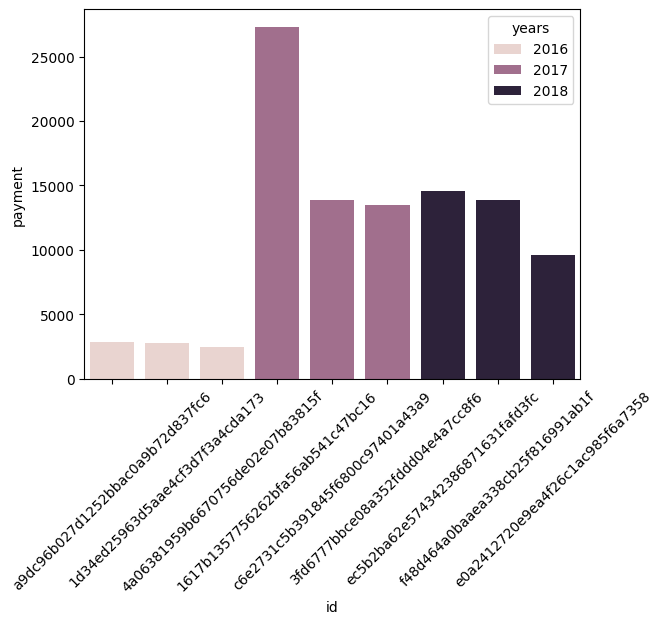

In [46]:
query="""SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp)
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM orders
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id
) AS a
WHERE d_rank <= 3;"""
cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])
print(df)
sns.barplot(x="id", y="payment", data=df, hue="years")
plt.xticks(rotation=45)
plt.show()